In [6]:
!pip install fredapi

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from fredapi import Fred

In [20]:
#plt.style.use('fivethirtyeight')
#pd.set_option('max_columns', 500)
#color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fred_key = 'c9df64775821ffbe8b98e9b8ad500ac4'

In [21]:
fred = Fred(api_key=fred_key)

In [22]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-06-15,2023-06-15,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-06-14,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-06-15 08:48:03-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-06-15,2023-06-15,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-05-30 09:01:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-06-15,2023-06-15,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-06-14,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-06-15 08:48:07-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-06-15,2023-06-15,S&P 500,2013-06-17,2023-06-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-06-14 19:10:48-05:00,83,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-06-15,2023-06-15,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-05-30 09:01:04-05:00,82,"For more information regarding the index, plea..."


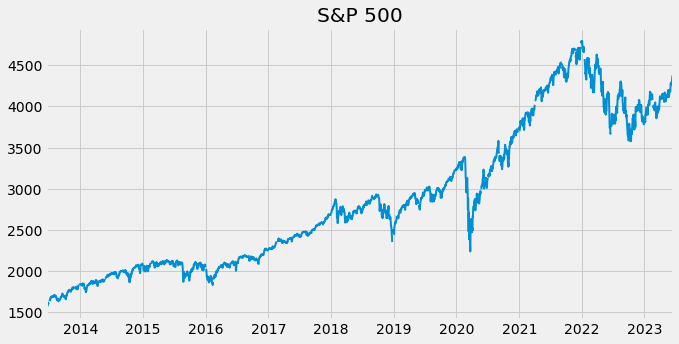

In [23]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

In [29]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-06-15,2023-06-15,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-06-15,2023-06-15,Unemployment Rate - Black or African American,1972-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:06-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-06-15,2023-06-15,Unemployment Rate in California,1976-01-01,2023-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-23 09:16:01-05:00,59,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-06-15,2023-06-15,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,52,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-06-15,2023-06-15,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,9,Series Is Presented Here As Three Variables--(...


In [37]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
uemp_results = pd.concat(all_results, axis=1)
uemp_results

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,FLUR,TXUR,NYUR,LNS14000002,LNS14000031,...,LRUN25FEUSM156S,USAURAMS,LNS14000089,LRUN24TTUSM156S,LRUN25TTUSM156S,LNS14000026,LNS14000025,LNS14000029,LNS14000093,LNS14000048
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,3.4,5.4,4.2,NaN,NaN,2.6,3.9,4.2,3.3,5.3,...,2.9,NaN,3.9,8.0,3.0,3.1,3.2,2.8,2.3,2.8
2023-02-01,3.6,5.7,4.4,NaN,NaN,2.6,4.0,4.2,3.5,5.1,...,3.0,NaN,3.9,8.1,3.1,3.2,3.3,2.9,2.6,2.9
2023-03-01,3.5,5.0,4.4,NaN,NaN,2.6,4.0,4.1,3.4,5.2,...,2.8,NaN,3.8,7.5,2.9,3.1,3.4,3.0,2.4,2.9
2023-04-01,3.4,4.7,4.5,NaN,NaN,2.6,4.0,4.0,3.3,4.5,...,NaN,NaN,3.8,NaN,NaN,3.1,3.3,2.8,2.4,2.9


In [47]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)
uemp_results

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,ALUR,PAUR,NCUR,ILUR,...,KSUR,NHUR,PRUR,RIUR,DEUR,IDUR,MEUR,WYUR,NEUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,4.2,2.6,3.9,4.2,4.0,4.3,2.6,4.3,3.8,4.5,...,2.9,2.8,6.0,3.1,4.6,2.7,2.9,3.9,2.5,2.9
2023-02-01,4.4,2.6,4.0,4.2,3.9,4.3,2.5,4.4,3.6,4.5,...,2.9,2.7,6.0,3.1,4.6,2.6,2.8,3.8,2.3,2.8
2023-03-01,4.4,2.6,4.0,4.1,3.8,4.1,2.3,4.2,3.5,4.4,...,2.9,2.4,6.0,3.1,4.4,2.6,2.6,3.7,2.1,2.7
2023-04-01,4.5,2.6,4.0,4.0,3.7,3.8,2.2,4.1,3.4,4.2,...,2.9,2.1,6.0,3.0,4.3,2.6,2.4,3.5,2.0,2.4


In [50]:
uemp_states = uemp_results
uemp_states

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,ALUR,PAUR,NCUR,ILUR,...,KSUR,NHUR,PRUR,RIUR,DEUR,IDUR,MEUR,WYUR,NEUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,4.2,2.6,3.9,4.2,4.0,4.3,2.6,4.3,3.8,4.5,...,2.9,2.8,6.0,3.1,4.6,2.7,2.9,3.9,2.5,2.9
2023-02-01,4.4,2.6,4.0,4.2,3.9,4.3,2.5,4.4,3.6,4.5,...,2.9,2.7,6.0,3.1,4.6,2.6,2.8,3.8,2.3,2.8
2023-03-01,4.4,2.6,4.0,4.1,3.8,4.1,2.3,4.2,3.5,4.4,...,2.9,2.4,6.0,3.1,4.4,2.6,2.6,3.7,2.1,2.7
2023-04-01,4.5,2.6,4.0,4.0,3.7,3.8,2.2,4.1,3.4,4.2,...,2.9,2.1,6.0,3.0,4.3,2.6,2.4,3.5,2.0,2.4


<AxesSubplot:>

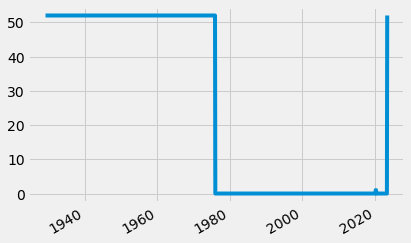

In [51]:
uemp_states.isna().sum(axis=1).plot()

In [52]:
uemp_states = uemp_states.dropna()
uemp_states

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,ALUR,PAUR,NCUR,ILUR,...,KSUR,NHUR,PRUR,RIUR,DEUR,IDUR,MEUR,WYUR,NEUR,VTUR
1976-01-01,9.2,9.7,5.8,10.3,8.1,9.9,6.6,8.0,6.4,6.6,...,4.2,6.5,19.6,7.8,8.0,5.6,8.7,4.1,3.3,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,9.9,6.6,8.1,6.4,6.6,...,4.2,6.5,19.5,7.8,8.0,5.6,8.7,4.1,3.3,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,9.9,6.6,8.1,6.4,6.6,...,4.2,6.5,19.3,7.7,8.0,5.6,8.6,4.1,3.3,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,9.8,6.5,8.1,6.3,6.6,...,4.2,6.5,19.0,7.7,8.1,5.6,8.6,4.0,3.2,8.6
1976-05-01,9.0,9.3,5.9,10.1,7.8,9.6,6.4,8.1,6.1,6.6,...,4.2,6.5,18.9,7.7,8.3,5.6,8.5,3.9,3.1,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,4.1,2.7,3.8,4.1,4.1,4.3,2.6,4.3,3.8,4.6,...,2.9,2.9,6.0,3.2,4.6,2.8,3.1,3.9,2.7,3.0
2023-01-01,4.2,2.6,3.9,4.2,4.0,4.3,2.6,4.3,3.8,4.5,...,2.9,2.8,6.0,3.1,4.6,2.7,2.9,3.9,2.5,2.9
2023-02-01,4.4,2.6,4.0,4.2,3.9,4.3,2.5,4.4,3.6,4.5,...,2.9,2.7,6.0,3.1,4.6,2.6,2.8,3.8,2.3,2.8
2023-03-01,4.4,2.6,4.0,4.1,3.8,4.1,2.3,4.2,3.5,4.4,...,2.9,2.4,6.0,3.1,4.4,2.6,2.6,3.7,2.1,2.7


In [54]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]
uemp_states

,California,Florida,Texas,New York,Ohio,Michigan,Alabama,Pennsylvania,North Carolina,Illinois,...,Kansas,New Hampshire,Puerto Rico,Rhode Island,Delaware,Idaho,Maine,Wyoming,Nebraska,Vermont
1976-01-01,9.2,9.7,5.8,10.3,8.1,9.9,6.6,8.0,6.4,6.6,...,4.2,6.5,19.6,7.8,8.0,5.6,8.7,4.1,3.3,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,9.9,6.6,8.1,6.4,6.6,...,4.2,6.5,19.5,7.8,8.0,5.6,8.7,4.1,3.3,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,9.9,6.6,8.1,6.4,6.6,...,4.2,6.5,19.3,7.7,8.0,5.6,8.6,4.1,3.3,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,9.8,6.5,8.1,6.3,6.6,...,4.2,6.5,19.0,7.7,8.1,5.6,8.6,4.0,3.2,8.6
1976-05-01,9.0,9.3,5.9,10.1,7.8,9.6,6.4,8.1,6.1,6.6,...,4.2,6.5,18.9,7.7,8.3,5.6,8.5,3.9,3.1,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,4.1,2.7,3.8,4.1,4.1,4.3,2.6,4.3,3.8,4.6,...,2.9,2.9,6.0,3.2,4.6,2.8,3.1,3.9,2.7,3.0
2023-01-01,4.2,2.6,3.9,4.2,4.0,4.3,2.6,4.3,3.8,4.5,...,2.9,2.8,6.0,3.1,4.6,2.7,2.9,3.9,2.5,2.9
2023-02-01,4.4,2.6,4.0,4.2,3.9,4.3,2.5,4.4,3.6,4.5,...,2.9,2.7,6.0,3.1,4.6,2.6,2.8,3.8,2.3,2.8
2023-03-01,4.4,2.6,4.0,4.1,3.8,4.1,2.3,4.2,3.5,4.4,...,2.9,2.4,6.0,3.1,4.4,2.6,2.6,3.7,2.1,2.7


In [55]:
px.line(uemp_states)

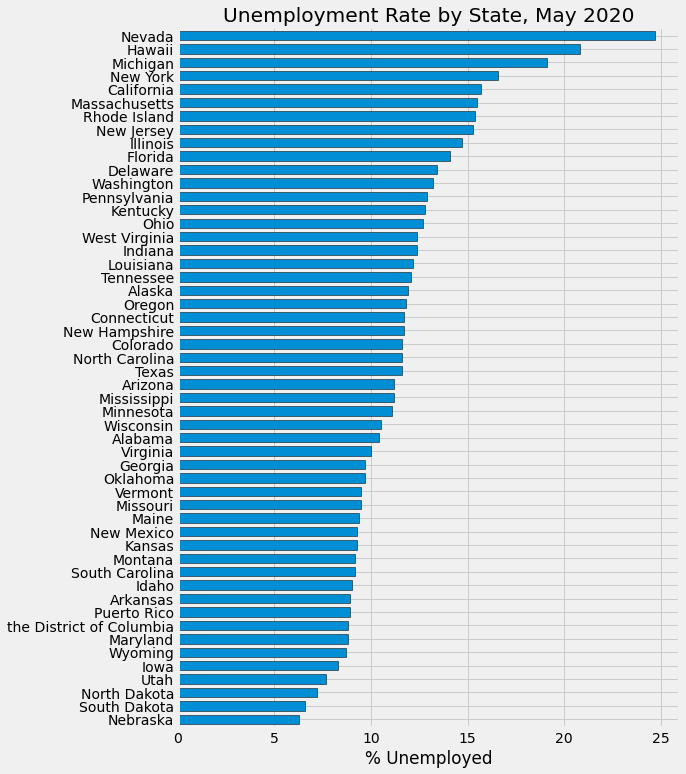

In [58]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [71]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2023-06-15,2023-06-15,Labor Force Participation Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2023-06-15,2023-06-15,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:06-05:00,67,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2023-06-15,2023-06-15,Labor Force Participation Rate - Women,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:09-05:00,63,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2023-06-15,2023-06-15,Labor Force Participation Rate - Men,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:16-05:00,56,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2023-06-15,2023-06-15,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:17-05:00,52,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRAC24TTKRM156S,LRAC24TTKRM156S,2023-06-15,2023-06-15,Activity Rate: Aged 15-24: All Persons for the...,1999-06-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-10 14:37:30-05:00,0,OECD descriptor ID: LRAC24TT OECD unit ID: STS...
LRAC25TTKRM156S,LRAC25TTKRM156S,2023-06-15,2023-06-15,Activity Rate: Aged 25-54: All Persons for the...,1999-06-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-10 14:37:29-05:00,0,OECD descriptor ID: LRAC25TT OECD unit ID: STS...
LRIN25TTKRM156S,LRIN25TTKRM156S,2023-06-15,2023-06-15,Inactivity Rate: Aged 25-54: All Persons for t...,1999-06-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-10 14:37:21-05:00,0,OECD descriptor ID: LRIN25TT OECD unit ID: STS...


In [90]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2023-06-15,2023-06-15,Labor Force Participation Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2023-06-15,2023-06-15,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:06-05:00,67,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2023-06-15,2023-06-15,Labor Force Participation Rate - Women,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:09-05:00,63,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2023-06-15,2023-06-15,Labor Force Participation Rate - Men,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:16-05:00,56,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2023-06-15,2023-06-15,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:17-05:00,52,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRIN24TTUSM156S,LRIN24TTUSM156S,2023-06-15,2023-06-15,Inactivity Rate: Aged 15-24: All Persons for t...,1977-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-10 14:26:43-05:00,0,OECD descriptor ID: LRIN24TT OECD unit ID: STS...
LRINTTTTUSM156S,LRINTTTTUSM156S,2023-06-15,2023-06-15,Inactivity Rate: Aged 15 and Over: All Persons...,1975-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-10 14:26:36-05:00,1,OECD descriptor ID: LRINTTTT OECD unit ID: STS...
LRACTTTTUSM156S,LRACTTTTUSM156S,2023-06-15,2023-06-15,Activity Rate: Aged 15 and Over: All Persons f...,1960-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-10 14:26:55-05:00,1,OECD descriptor ID: LRACTTTT OECD unit ID: STS...


In [94]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
part_states = pd.concat(all_results, axis=1)
part_states

,CIVPART,LNS11300060,LNS11300002,LNS11300001,LNS11324230,LNS11300012,LRAC25MAUSM156S,LNS11300006,LNS11300036,LBSSA06,...,LRIN25TTUSM156S,LRINTTMAUSM156S,LRACTTMAUSM156S,LRACTTFEUSM156S,LRINTTFEUSM156S,LRIN24TTUSM156S,LRINTTTTUSM156S,LRACTTTTUSM156S,LRIN64FEUSM156S,LRIN74TTUSM156S
1948-01-01,58.6,64.2,32.0,86.7,43.0,53.2,NaN,NaN,64.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,58.9,64.6,32.4,87.0,43.3,53.7,NaN,NaN,64.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,58.5,64.3,32.1,86.3,43.0,54.1,NaN,NaN,63.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,59.0,64.8,33.0,86.6,43.4,54.2,NaN,NaN,63.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,58.3,64.3,32.0,86.1,43.2,50.9,NaN,NaN,63.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,62.4,82.7,57.0,67.9,38.7,37.2,88.5,62.9,71.5,62.1,...,17.307474,32.050247,67.9,57.0,43.000669,43.492656,37.648235,62.4,30.499260,32.332860
2023-02-01,62.5,83.1,57.2,68.0,38.4,37.5,88.9,63.4,72.0,62.2,...,16.946772,31.980226,68.0,57.2,42.828265,43.148125,37.525929,62.5,30.364845,32.207218
2023-03-01,62.6,83.1,57.1,68.4,38.6,37.4,89.1,64.1,72.0,62.3,...,16.846993,31.618133,68.4,57.1,42.895344,43.128834,37.383202,62.6,30.479836,32.081975
2023-04-01,62.6,83.3,57.3,68.1,38.4,37.1,NaN,63.0,70.9,62.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

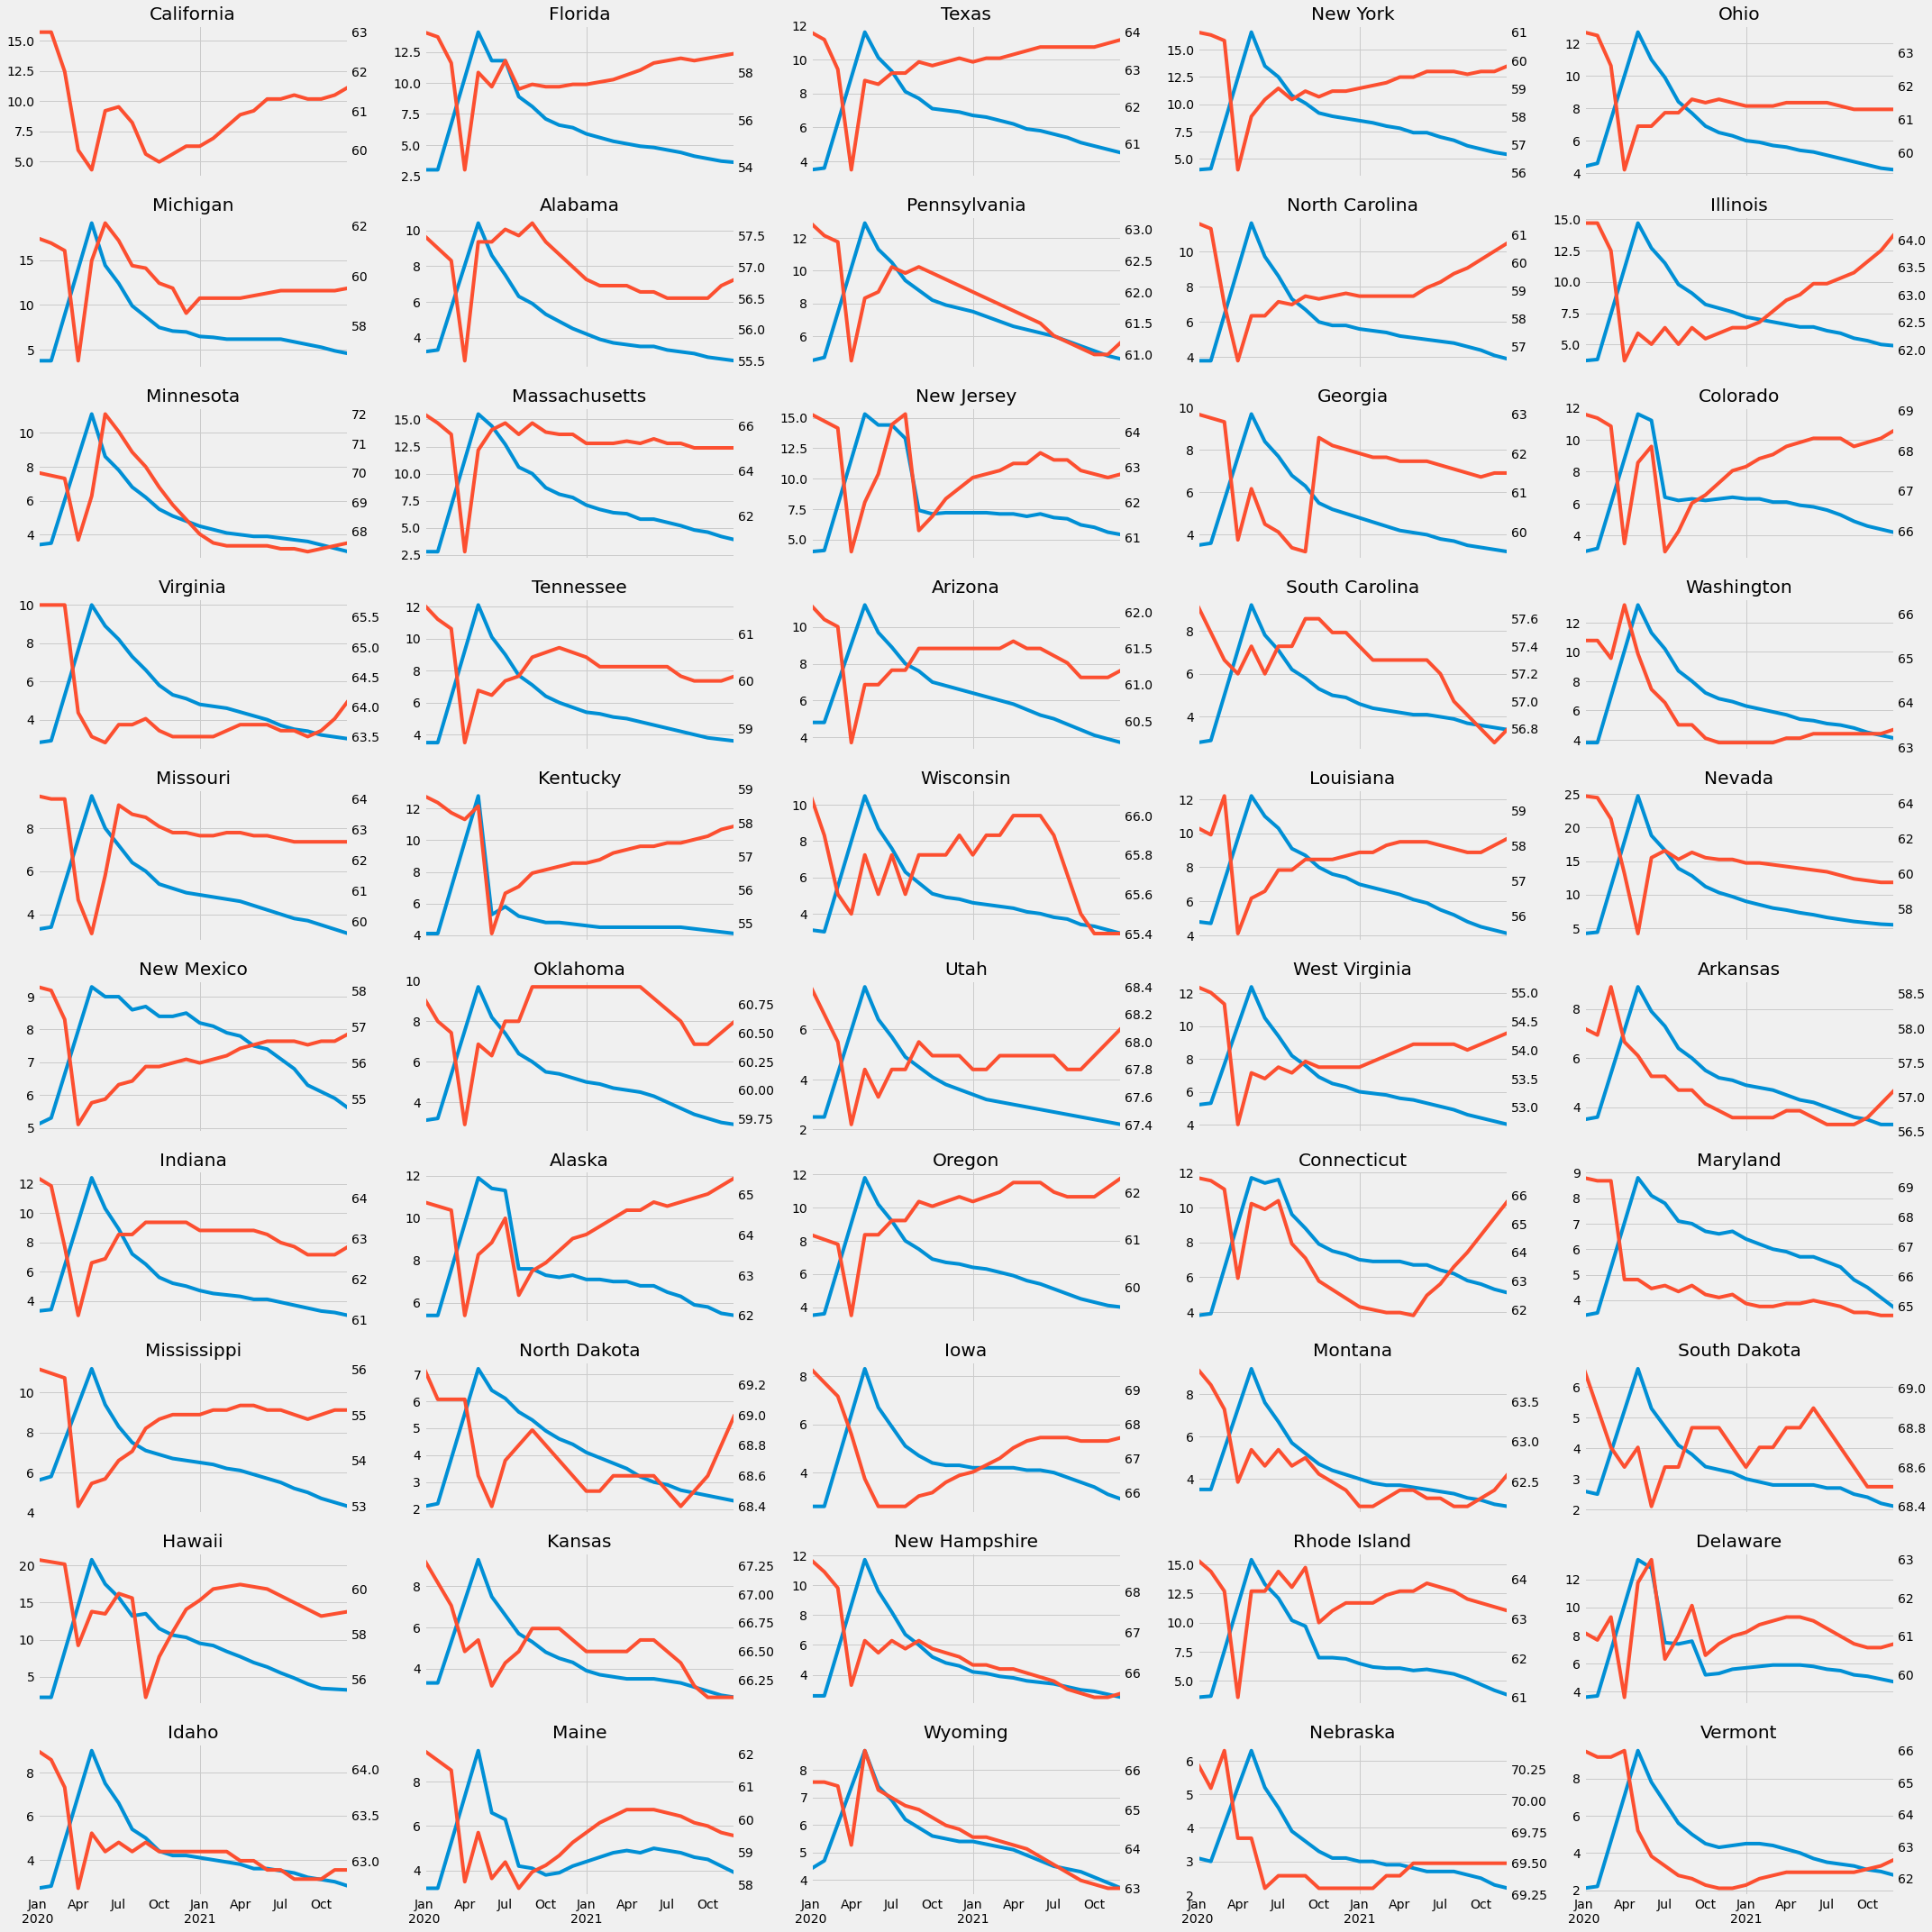

In [103]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

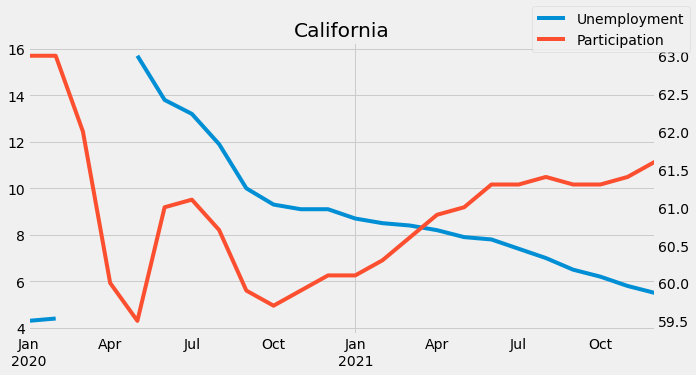

In [104]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()